# Project

## Importing libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import BaggingRegressor,AdaBoostRegressor,ExtraTreesRegressor,RandomForestRegressor,GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
le=LabelEncoder()

## Importing datasets

In [3]:
dataset=pd.read_csv('housing-price-predictor/housing_price_dataset.csv')
dataset.head()

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,2126,4,1,Rural,1969,215355.283618
1,2459,3,2,Rural,1980,195014.221626
2,1860,2,1,Suburb,1970,306891.012076
3,2294,2,1,Urban,1996,206786.787153
4,2130,5,2,Suburb,2001,272436.239065


## Analysing data

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SquareFeet    50000 non-null  int64  
 1   Bedrooms      50000 non-null  int64  
 2   Bathrooms     50000 non-null  int64  
 3   Neighborhood  50000 non-null  object 
 4   YearBuilt     50000 non-null  int64  
 5   Price         50000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 2.3+ MB


In [5]:
# 'Bedrooms','Bathrooms','YearBuilt'
dataset['SquareFeet']=dataset['SquareFeet'].astype(dtype='int32')
dataset['Bedrooms']=dataset['Bedrooms'].astype(dtype='int32')
dataset['Bathrooms']=dataset['Bathrooms'].astype(dtype='int32')
dataset['YearBuilt']=dataset['YearBuilt'].astype(dtype='int32')
dataset['Price']=dataset['Price'].astype(dtype='float32')

In [6]:
# plt.bar(dataset['YearBuilt'],dataset['Price'])

In [7]:
# plt.bar(dataset['Neighborhood'],dataset['Price'])

In [8]:
# plt.bar(dataset['Bedrooms'],dataset['Price'])

In [9]:
# plt.bar(dataset['SquareFeet'],dataset['Price'])

In [10]:
# plt.bar(dataset['Bathrooms'],dataset['Price'])

In [11]:
# dataset.isna().sum()

## Data Preprocessing

In [12]:
dataset['Neighborhood']=le.fit_transform(dataset['Neighborhood'])
dataset['Neighborhood']=dataset['Neighborhood'].astype(dtype='int32')

## Training models

In [17]:
X=dataset[['YearBuilt','Neighborhood','Bedrooms','SquareFeet','Bathrooms']]
y=dataset['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

linear_reg=LinearRegression()
bagging=BaggingRegressor(n_estimators=3000)
ada=AdaBoostRegressor(n_estimators=3000)
extra_trees=ExtraTreesRegressor(n_estimators=3000)
rfc=RandomForestRegressor(n_estimators=3000)
grad_boost=GradientBoostingRegressor(n_estimators=3000)
mlpr=MLPRegressor(hidden_layer_sizes=[5,5,5])
clfs = {
    # 'LinearRegression': linear_reg,
    # 'Bagging-Regressor':bagging,
    # 'AdaBoost-Regressor':ada,
    # 'Extra-Trees-Regressor':extra_trees,
    # 'Random-Forest-Regressor':rfc,
    # 'Gradient-Boosting-Regressor':grad_boost,
    'Multi-Layer-Perceptron-Regressor':mlpr,
}



Multi-Layer-Perceptron-Regressor
Mean Squared Error: 2455386975.3985453


d:\IDEs\anaconda\envs\house-prediction\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


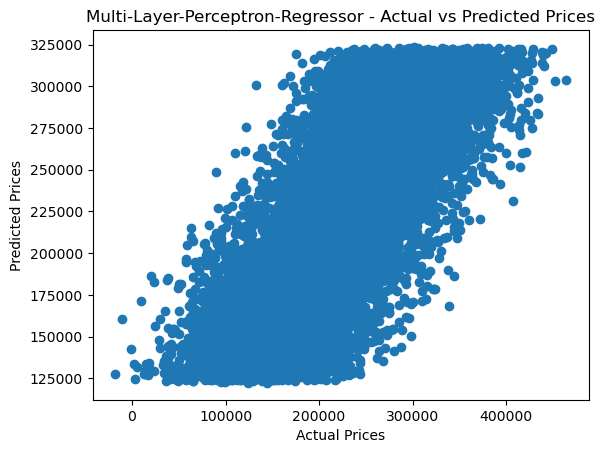

In [18]:
for name,clf in clfs.items():
    print(name)
    clf.fit(X_train,y_train)
    ypred=clf.predict(X_test)
    
    # Calculate mean squared error (you can use other regression metrics as well)
    mse = mean_squared_error(y_test, ypred)
    print(f"Mean Squared Error: {mse}")
    
    # Plotting predictions vs actual values
    plotting_data = pd.DataFrame({'Test data': y_test.values, 'Predictions': ypred})
    plt.figure()
    colors = ['red','blue']
    plt.scatter(plotting_data['Test data'], plotting_data['Predictions'])
    plt.xlabel('Actual Prices')
    plt.ylabel('Predicted Prices')
    plt.title(f'{name} - Actual vs Predicted Prices')
    plt.show()